<a href="https://colab.research.google.com/github/AFMonteiro/Practice_projects/blob/main/Practice_Project_Bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
from pathlib import Path

# Create empty database
Path("bank.db").touch()

# Connect to database
conn = sqlite3.connect("bank.db")
c = conn.cursor()



# Create a table
c.execute(
    """CREATE TABLE bank (
    age int, job text,
    marital text, education text,
    default_e text, balance int,
    housing text, loan text,
    contact text, day int,
    month text, duration int,
    campaign int, pdays text,
    previous int, poutcome text,
    deposit text
    );"""
)


In [2]:

# Import pandas to work with data sets
import pandas as pd


# Open csv file
bank = pd.read_csv("bank.csv")

# Add table to database
bank.to_sql("bank", conn, if_exists="append", index=False)

In [3]:
# Import Seaborn to create visualizations of dataframes from queries
import seaborn as sns

from IPython.display import display, HTML
import matplotlib.pyplot as plt

# New Section

In [4]:
#Count the number of rows in the file
len(bank)

11162

In [5]:
# Ouput the entire data as a table, limited to the first 5 results.  
q0 = pd.read_sql_query("""SELECT * FROM bank LIMIT 10""", conn)
display(q0)

,age,job,marital,education,default_e,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


,AVG(age),job
0,39.374063,admin.
1,39.505144,blue-collar
2,42.887195,entrepreneur
3,47.445255,housemaid
4,40.218239,management
5,65.424165,retired
6,39.809877,self-employed
7,38.141928,services
8,26.102778,student
9,39.001646,technician


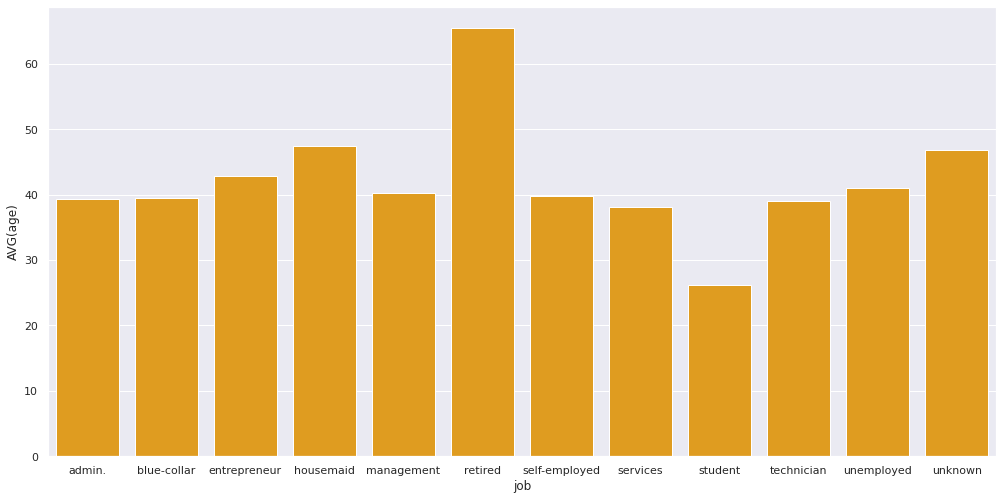

In [18]:
# Query to output the average age of each profession.
q1 = pd.read_sql_query("""SELECT AVG(age), job FROM bank GROUP BY 2""", conn)
display(q1)
# Output a bar plot comparing the average age for each occupation.
sns.barplot(y = q1['AVG(age)'], x = q1['job'], ci = None, color = 'orange')



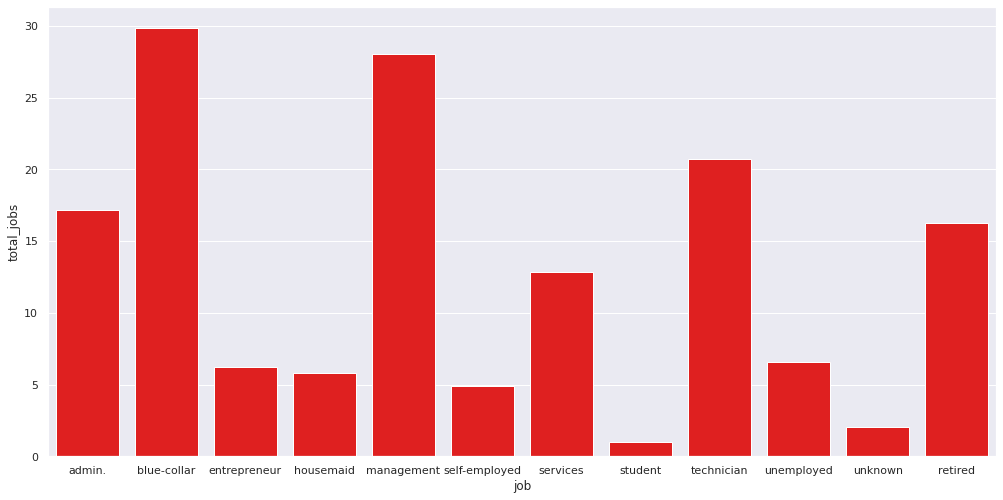

In [7]:

# Query to output the number of each profession for people over the age of 45.
q2 = pd.read_sql_query("""SELECT age, job, COUNT(job) AS total_jobs FROM bank GROUP BY age, job HAVING age > 45""", conn)
#print(q2)

# Output a bar plot comparing the total number of jobs for each occupation.
sns.set(rc={'figure.figsize':(17,8.27)})
sns.barplot(x = q2['job'], y = q2['total_jobs'], ci = None, color = 'red')


,yes_people,perc_yes,no_people,perc_no,total_people
0,51,4.76,1020,95.24,1071


[4, 95]


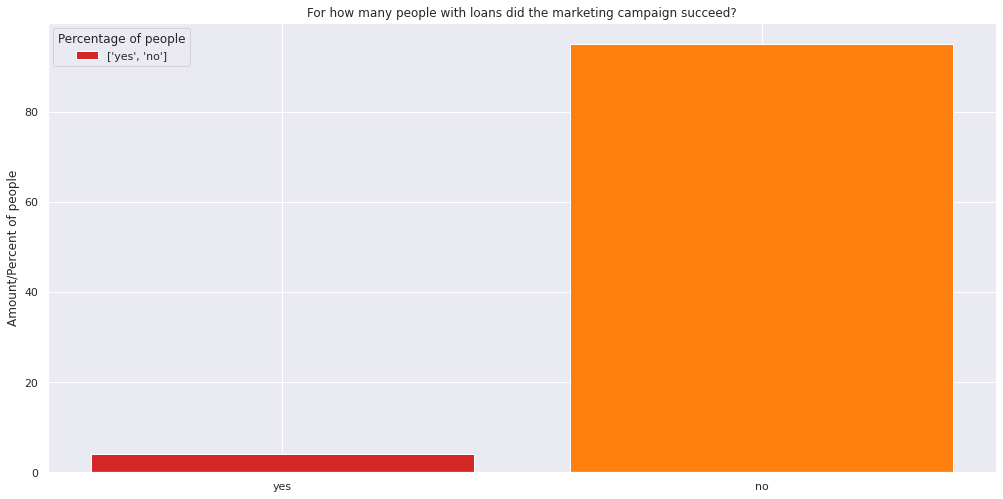

In [64]:
#For how many people with loans did the marketing campaign succeed?
q3 = pd.read_sql_query("""SELECT yes_people, 
                                 ROUND(CAST(yes_people AS FLOAT)/CAST(total_people AS FLOAT) * 100, 2) AS perc_yes, 
                                 no_people, 
                                 ROUND(CAST(no_people AS FLOAT)/CAST(total_people AS FLOAT) * 100, 2) AS perc_no,
                                 total_people
                          FROM (SELECT COUNT(CASE WHEN loan = 'yes' THEN '1' END) AS yes_people, 
                                       COUNT(CASE WHEN loan = 'no' THEN '1' END) AS no_people, 
                                       COUNT(*) AS total_people 
                                FROM bank 
                                WHERE LOWER(poutcome) = 'success')""", conn)
display(q3)

# Output a bar plot comparing the percentage of people who had loans and were swayed by the marketing campaign. 
fig, ax = plt.subplots()

x = ['yes','no']
y = [q3['perc_yes'], q3['perc_no']]
y = [int(item) for item in y]
print(y)

bar_labels = ['yes', 'no']
bar_colors = ['tab:red', 'tab:orange']

ax.bar(x,y, label=bar_labels, color=bar_colors)

ax.set_title('For how many people with loans did the marketing campaign succeed?')
ax.set_ylabel('Amount/Percent of people')
ax.legend(title='Percentage of people')
